In [ ]:
## Kevin

In [1]:
pip install google-api-python-client

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install isodate

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Dependencies
import pandas as pd
import requests
import json
from matplotlib import pyplot as plt
from googleapiclient.discovery import build
import isodate

# Import the API key
from config import api_key

# Initialize YouTube Data API v3
youtube = build('youtube', 'v3', developerKey=api_key)

# Define the region codes for US(United States), GB(United Kingdom), and CA(Canada)
regions = {
    "US": "United States",
    "GB": "United Kingdom",
    "CA": "Canada"
}

def get_video_category(category_id):

    request = youtube.videoCategories().list(
        part="snippet",
        id=category_id
    )
    response = request.execute()
    category_name = response["items"][0]["snippet"]["title"]
    return category_name

def format_duration(duration):
    
    duration_obj = isodate.parse_duration(duration)
    minutes = duration_obj.total_seconds() // 60
    seconds = duration_obj.total_seconds() % 60
    return f"{int(minutes)}m {int(seconds)}s"
    
def get_trending_videos(region_code):
    # Call the API to get the top trending videos
    request = youtube.videos().list(
        part="snippet,statistics,contentDetails",
        chart="mostPopular",
        regionCode=region_code,
        maxResults=100
    )
    response = request.execute()

    # Extract video information
    videos = []
    for item in response["items"]:
        try:
            video_id = item["id"]
            video_title = item["snippet"]["title"]
            video_category_id = item["snippet"]["categoryId"]
            video_category_name = get_video_category(video_category_id)
            video_views = item["statistics"]["viewCount"]
            video_likes = item["statistics"]["likeCount"]
            video_comments = item["statistics"]["commentCount"]
            video_duration = format_duration(item["contentDetails"]["duration"])
            videos.append({
                "id": video_id,
                "title": video_title,
                "category": video_category_name,
                "views": video_views,
                "likes": video_likes,
                "comments": video_comments,
                "duration": video_duration
            })
        except Exception as e:
            print(f"Error processing video: {e} for {region_code}")
    return videos


# Get trending videos for each region
for region_code, region_name in regions.items():
    print(f"\nTop Trending Videos in {region_name}:")
    trending_videos = get_trending_videos(region_code)
    for video in trending_videos:
        print(f"Title: {video['title']}")
        print(f"Video ID: {video['id']}")
        print(f"Category: {video['category']}")
        print(f"Views: {video['views']}")
        print(f"Likes: {video['likes']}")
        print(f"Comments: {video['comments']}")
        print(f"Duration: {video['duration']}")
        print("-" * 30)

for region_code, region_name in regions.items():
    trending_videos = get_trending_videos(region_code)
    df = pd.DataFrame(trending_videos)
    file_name = f"trending_videos_{region_name}.csv"
    df.to_csv(file_name, index=False)
    print(f"Trending videos for {region_name} exported to {file_name}")


Top Trending Videos in United States:
Error processing video: 'viewCount' for US
Error processing video: 'viewCount' for US
Error processing video: 'commentCount' for US
Error processing video: 'likeCount' for US
Title: Max Holloway KOs Justin Gaethje to Win the BMF Belt at UFC 300!
Video ID: h9KBcib8pHc
Category: Sports
Views: 3609652
Likes: 96845
Comments: 10245
Duration: 4m 18s
------------------------------
Title: Rick Ross - Champagne Moments (Drake Diss) (AUDIO)
Video ID: Z-zLBDmB6Fc
Category: Music
Views: 1193015
Likes: 37160
Comments: 8515
Duration: 3m 10s
------------------------------
Title: Alex Pereira knocks out Jamahal Hill and delivers the COLDEST celebration of all time 🥶 #UFC300
Video ID: NVDPGPwcFPs
Category: Sports
Views: 1676231
Likes: 11682
Comments: 1345
Duration: 1m 19s
------------------------------
Title: UFC 300: Post-Fight Press Conference
Video ID: TG9dx1NrL3Y
Category: Sports
Views: 1296176
Likes: 26254
Comments: 2835
Duration: 86m 55s
--------------------

In [4]:
## Sophia
#Getting the statistical measures for the trending YouTube Videos.

In [5]:
#Reading each of the CSV files:
import numpy as np
trending_videos_ca = pd.read_csv('trending_videos_Canada.csv')
trending_videos_us = pd.read_csv('trending_videos_United States.csv')
trending_videos_gb = pd.read_csv('trending_videos_United Kingdom.csv')

In [6]:
# Defining columns and dictionary to store statistics for each region and column
#For Canada
numerical_columns = ['views', 'comments']
ca_stats = {}
    # Iterate over each numerical column
for column in numerical_columns:
    numeric_values = pd.to_numeric(trending_videos_ca[column], errors='coerce')
    numeric_values = numeric_values.dropna()
        
        # Calculate statistics
    mean = round(np.mean(numeric_values),2)
    median = round(np.median(numeric_values),2)
    variance = round(np.var(numeric_values),2)
    std_dev = round(np.std(numeric_values),2)
    std_error = round(std_dev / np.sqrt(len(numeric_values)),2)

        # Creating dictionary with our statistics
    ca_stats[column] = {
        'Mean': mean,
        'Median': median,
        'Variance': variance,
        'Std. Deviation': std_dev,
        'Std. Error': std_error
    }
# Print statistics for this reigon
print('Statistics for Canada:')
for column, stats in ca_stats.items():
    print(f"\n{column}:")
    for stat, value in stats.items():
        print(f"{stat}: {value}")
    print('-' * 30)
ca_stats_df = pd.DataFrame(ca_stats)

Statistics for Canada:

views:
Mean: 2238508.76
Median: 855029.5
Variance: 19119810054018.83
Std. Deviation: 4372620.5
Std. Error: 618381.92
------------------------------

comments:
Mean: 7704.02
Median: 2622.0
Variance: 321152798.66
Std. Deviation: 17920.74
Std. Error: 2534.38
------------------------------


In [7]:
#For USA 
numerical_columns = ['views', 'comments']
us_stats = {}
    # Iterate over each numerical column
for column in numerical_columns:
    numeric_values = pd.to_numeric(trending_videos_us[column], errors='coerce')
    numeric_values = numeric_values.dropna()
        
        # Calculate statistics
    mean = round(np.mean(numeric_values),2)
    median = round(np.median(numeric_values),2)
    variance = round(np.var(numeric_values),2)
    std_dev = round(np.std(numeric_values),2)
    std_error = round(std_dev / np.sqrt(len(numeric_values)),2)


        # Creating dictionary with our statistics
    us_stats[column] = {
        'Mean': mean,
        'Median': median,
        'Variance': variance,
        'Std. Deviation': std_dev,
        'Std. Error': std_error
    }
# Print statistics for this reigon
print('Statistics for the United States:')
for column, stats in us_stats.items():
    print(f"\n{column}:")
    for stat, value in stats.items():
        print(f"{stat}: {value}")
    print('-' * 30)
us_stats_df = pd.DataFrame(us_stats)

Statistics for the United States:

views:
Mean: 1350816.93
Median: 925647.0
Variance: 1399972045709.76
Std. Deviation: 1183204.14
Std. Error: 174453.93
------------------------------

comments:
Mean: 4784.93
Median: 2575.0
Variance: 49448568.06
Std. Deviation: 7031.97
Std. Error: 1036.81
------------------------------


In [8]:
#For United Kingdom
numerical_columns = ['views', 'comments']
gb_stats = {}
    # Iterate over each numerical column
for column in numerical_columns:
    numeric_values = pd.to_numeric(trending_videos_gb[column], errors='coerce')
    numeric_values = numeric_values.dropna()
        
        # Calculate statistics
    mean = round(np.mean(numeric_values),2)
    median = round(np.median(numeric_values),2)
    variance = round(np.var(numeric_values),2)
    std_dev = round(np.std(numeric_values),2)
    std_error = round(std_dev / np.sqrt(len(numeric_values)),2)

        # Creating dictionary with our statistics
    gb_stats[column] = {
        'Mean': mean,
        'Median': median,
        'Variance': variance,
        'Std. Deviation': std_dev,
        'Std. Error': std_error
    }
# Print statistics for this reigon
print('Statistics for the United Kingdom:')
for column, stats in us_stats.items():
    print(f"\n{column}:")
    for stat, value in stats.items():
        print(f"{stat}: {value}")
    print('-' * 30)
gb_stats_df = pd.DataFrame(gb_stats)

Statistics for the United Kingdom:

views:
Mean: 1350816.93
Median: 925647.0
Variance: 1399972045709.76
Std. Deviation: 1183204.14
Std. Error: 174453.93
------------------------------

comments:
Mean: 4784.93
Median: 2575.0
Variance: 49448568.06
Std. Deviation: 7031.97
Std. Error: 1036.81
------------------------------


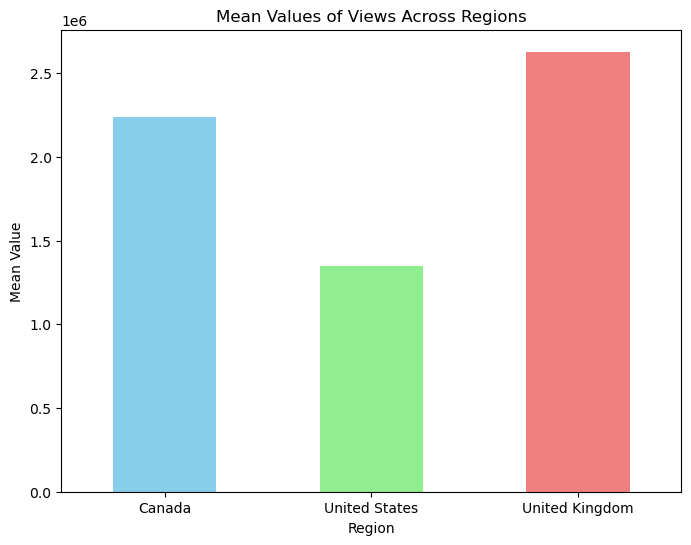

In [10]:
views_means = pd.Series({
    'Canada': ca_stats_df.loc['Mean']['views'],
    'United States': us_stats_df.loc['Mean']['views'],
    'United Kingdom': gb_stats_df.loc['Mean']['views']
})
#note: These numbers are in scientific notation due to the large number of views
plt.figure(figsize=(8, 6))
views_means.plot(kind='bar', color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Mean Values of Views Across Regions')
plt.ylabel('Mean Value')
plt.xlabel('Region')
plt.xticks(rotation=0)
plt.show()

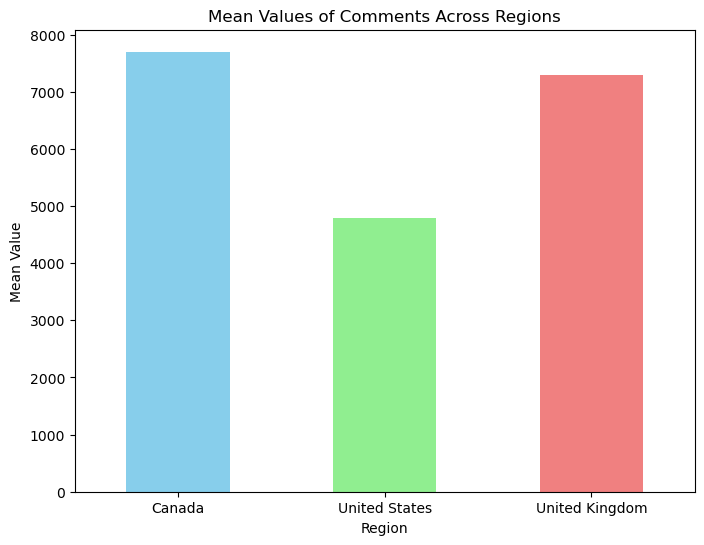

In [11]:
views_means = pd.Series({
    'Canada': ca_stats_df.loc['Mean']['comments'],
    'United States': us_stats_df.loc['Mean']['comments'],
    'United Kingdom': gb_stats_df.loc['Mean']['comments']
})

plt.figure(figsize=(8, 6))
views_means.plot(kind='bar', color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Mean Values of Comments Across Regions')
plt.ylabel('Mean Value')
plt.xlabel('Region')
plt.xticks(rotation=0)
plt.show()

In [ ]:
## Juan

In [ ]:
## Amanda

In [ ]:
## Shameer